In [12]:
# LIBRARYs

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import os
import argparse
import numpy as np

import pickle

from Utils.treino import *
from Utils.init_redes import *
from Utils.redes import *
from Utils.data_set import *
from Utils.graficos import *
from Utils.incerteza import *

In [13]:
pickle_in = open("./Data_sets/pickle/Cifar100/Normal/auc_list_resnet.pickle", "rb")
auc = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/correct_list_resnet.pickle", "rb")
correct = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/covarege_list_resnet.pickle", "rb")
covarege = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/auc_list_ensemble.pickle", "rb")
auc1 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/correct_list_ensemble.pickle", "rb")
correct1 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/covarege_list_ensemble.pickle", "rb")
covarege1 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/auc_list_Tdif.pickle", "rb")
auc2 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/correct_list_Tdif.pickle", "rb")
correct2 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Normal/covarege_list_Tdif.pickle", "rb")
covarege2 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/auc_list_ensemble.pickle", "rb")
auc12 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/correct_list_ensemble.pickle", "rb")
correct12 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/covarege_list_ensemble.pickle", "rb")
covarege12 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/auc_list_Tdif.pickle", "rb")
auc22 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/correct_list_Tdif.pickle", "rb")
correct22 = pickle.load(pickle_in)

pickle_in = open("./Data_sets/pickle/Cifar100/Meansoft/covarege_list_Tdif.pickle", "rb")
covarege22 = pickle.load(pickle_in)

T = np.arange(0.01,5.01,0.01)

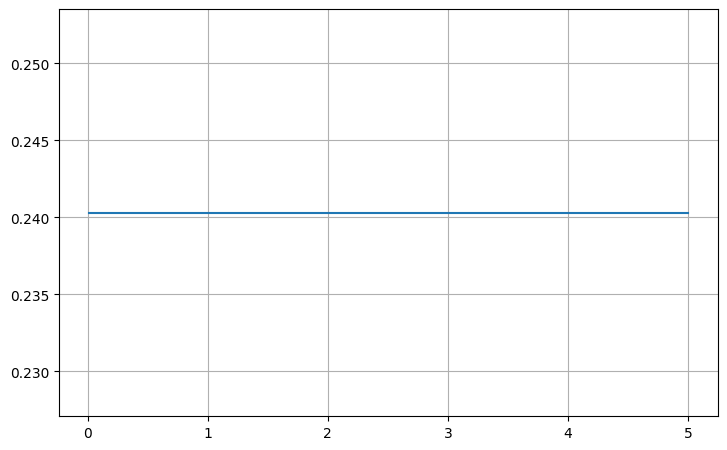

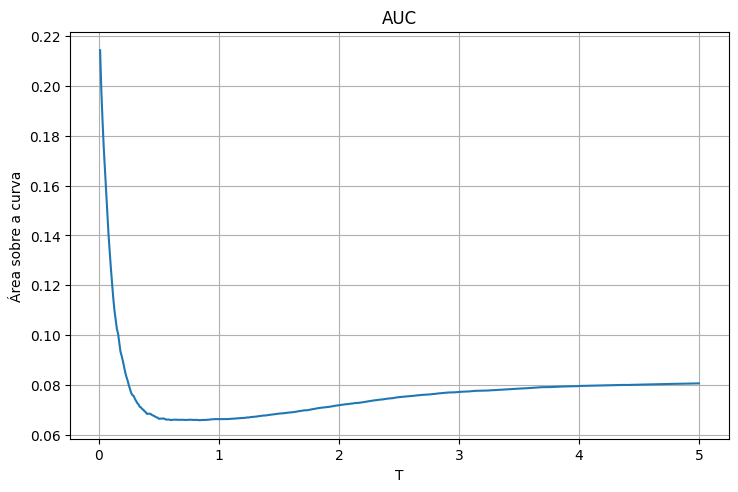

In [25]:
g1 = plot_graph(T,correct)

g2 = plot_graph(T,auc, title="AUC", xlabel="T", ylabel="Área sobre a curva")

g2.savefig("./Graficos/Temperatura/Cifar100/Normal/AUC.jpeg")
g1.savefig("./Graficos/Temperatura/Cifar100/Normal/acuracia.jpeg")

plt.show()

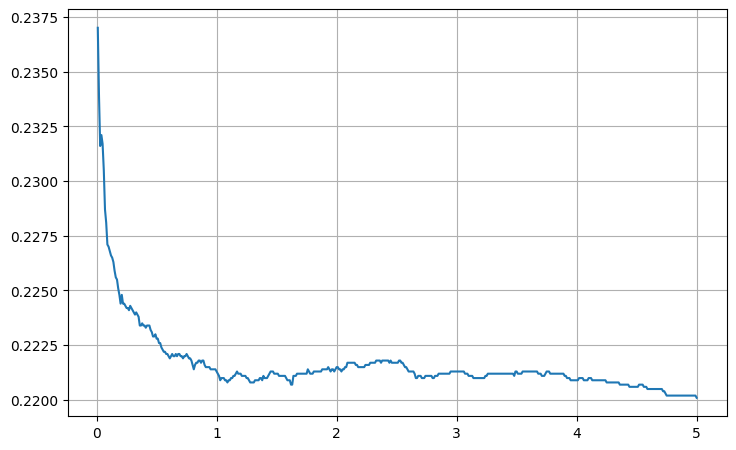

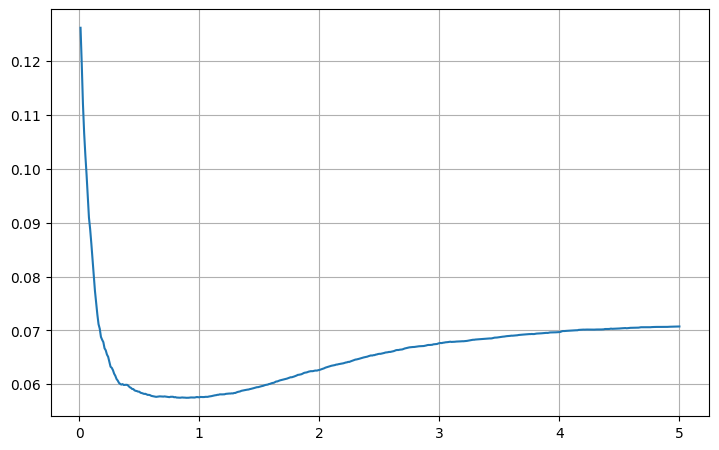

In [26]:
g1 = plot_graph(T,correct1)

g2 = plot_graph(T,auc1)

g2.savefig("./Graficos/Temperatura/Cifar100/Normal/AUC_Ensemble.jpeg")
g1.savefig("./Graficos/Temperatura/Cifar100/Normal/acuracia_Ensemble.jpeg")

plt.show()

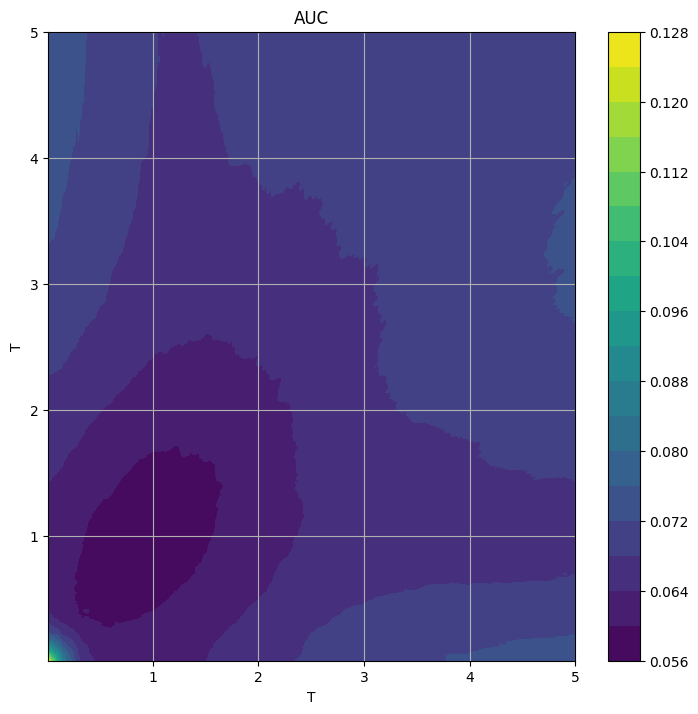

In [27]:
fig1 = plt.figure()
fig1.set_size_inches(8.5, 8.5)
ax1 = fig1.add_subplot()
fig1.subplots_adjust(top=0.85)
ax1.set_title("AUC")
ax1.set_xlabel("T")
ax1.set_ylabel("T")
pos1 = ax1.get_position()


X, Y = np.meshgrid(T, T)

index = 0
AUC = list()
for i in range(500):
    aux = list()
    for j in range(500):
        aux.append(auc2[index])
        index += 1
    AUC.append(aux)

ax2 = ax1.contourf(X, Y, AUC, levels=20)
ax2.changed()
cbar = plt.colorbar(ax2)

X, Y = np.meshgrid(T, T)

plt.grid()
plt.show()
fig1.savefig("./Graficos/Temperatura/Cifar100/Normal/AUC_Tdifs.jpeg")

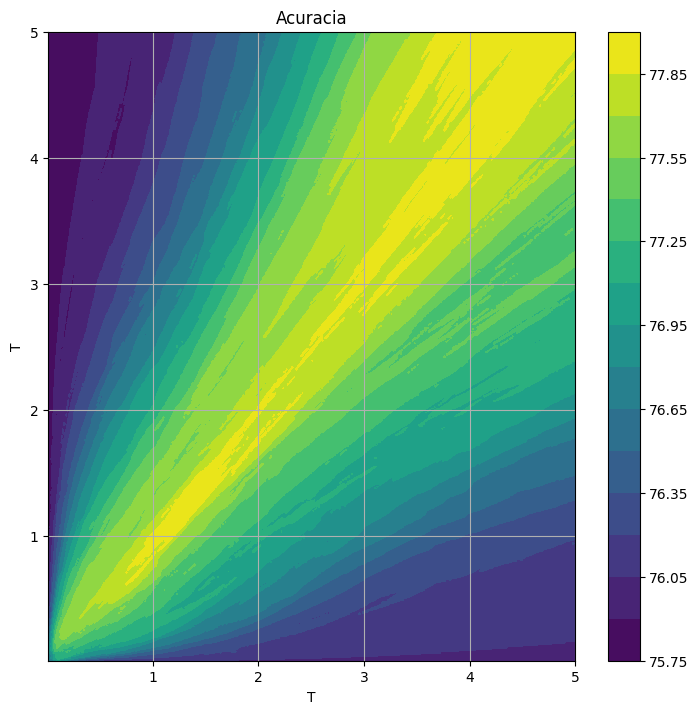

In [28]:
fig1 = plt.figure()
fig1.set_size_inches(8.5, 8.5)
ax1 = fig1.add_subplot()
fig1.subplots_adjust(top=0.85)
ax1.set_title("Acuracia")
ax1.set_xlabel("T")
ax1.set_ylabel("T")
pos1 = ax1.get_position()

index = 0
Correct = list()
for i in range(500):
    aux = list()
    for j in range(500):
        aux.append((1-correct2[index])*100)
        index += 1
    Correct.append(aux)

ax2 = ax1.contourf(X, Y, Correct, levels=20)
ax2.changed()
cbar2 = plt.colorbar(ax2)

plt.grid()
plt.show()
fig1.savefig("./Graficos/Temperatura/Cifar100/Normal/acuracia_Tdifs.jpeg")

In [29]:
valor1=list()
valor2=list()

for i in T:
    for j in T:
        valor1.append(i)
        valor2.append(j)

In [30]:
t1 = valor1[auc2.index(min(auc2))]
t2 = valor2[auc2.index(min(auc2))]
acuracia = (1-correct2[auc2.index(min(auc2))])*100
print(t1,t2, min(auc2), acuracia)

0.8300000000000001 0.87 0.05738089616309043 77.91


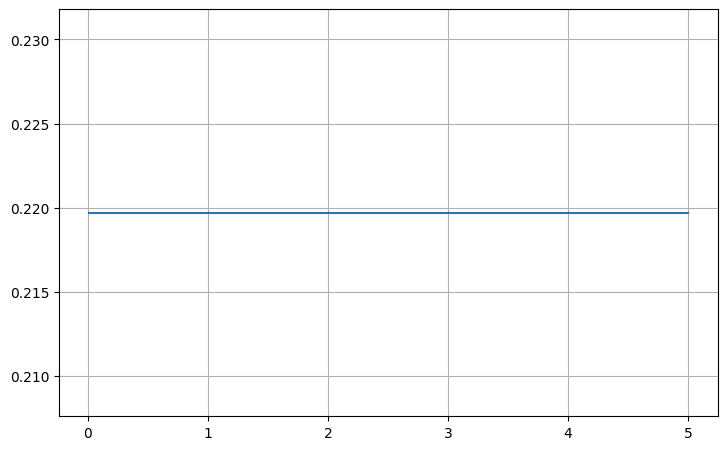

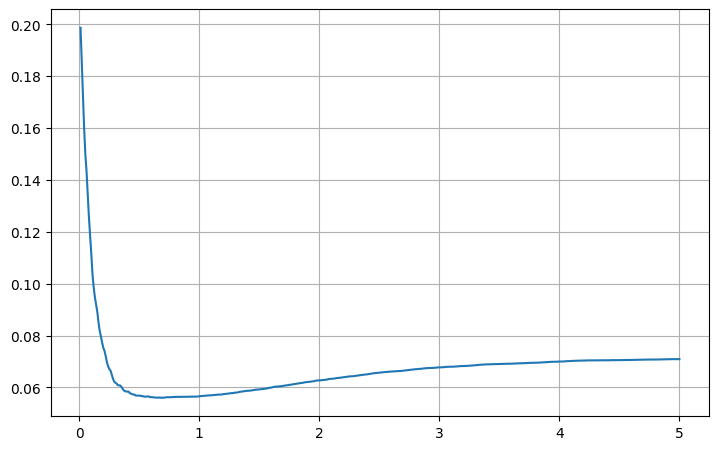

0.68 0.0559900726500881 78.03


In [40]:
g1 = plot_graph(T,correct12)

g2 = plot_graph(T,auc12)

g2.savefig("./Graficos/Temperatura/Cifar100/Meansoft/AUC.jpeg")
g1.savefig("./Graficos/Temperatura/Cifar100/Meansoft/acuracia.jpeg")

plt.show()

t = T[auc12.index(min(auc12))]
acuracia = (1-correct22[auc22.index(min(auc12))])*100
print(t, min(auc12), acuracia)

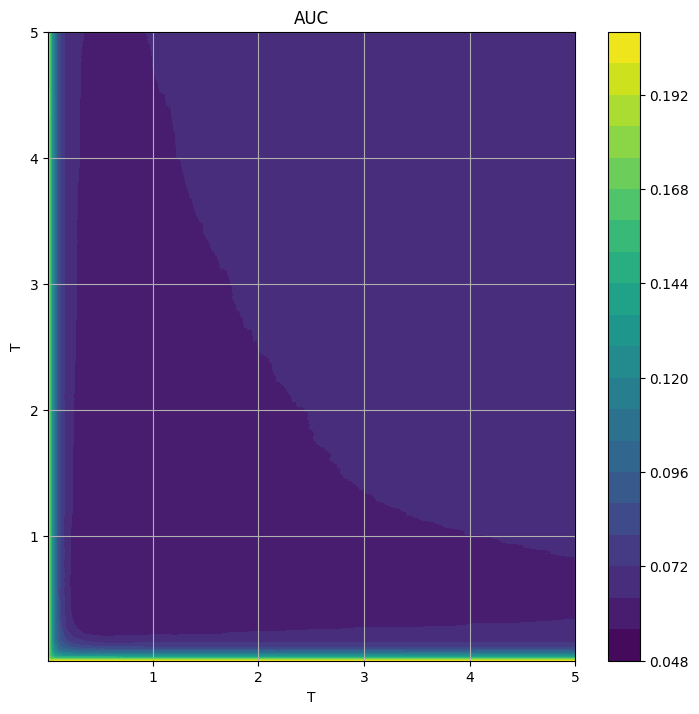

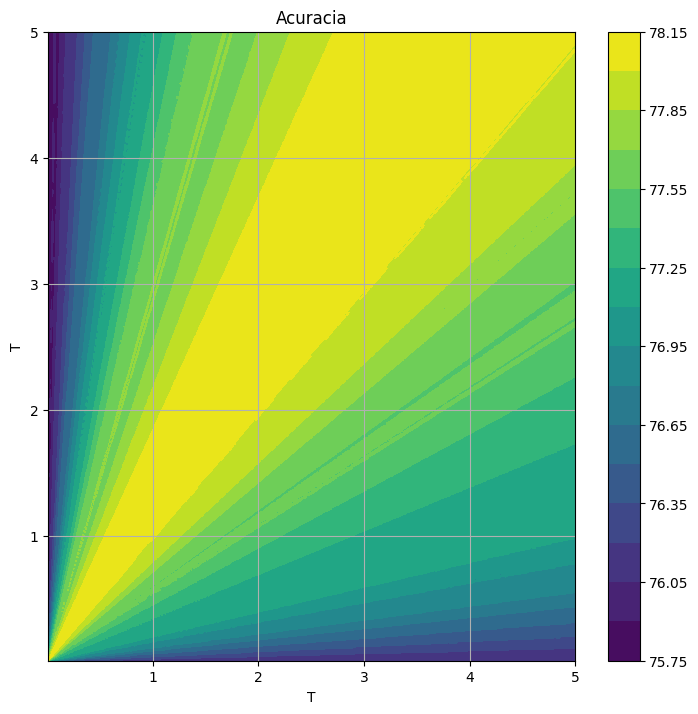

0.65 0.7000000000000001 0.05596739386645344 77.92999999999999


In [37]:
fig1 = plt.figure()
fig1.set_size_inches(8.5, 8.5)
ax1 = fig1.add_subplot()
fig1.subplots_adjust(top=0.85)
ax1.set_title("AUC")
ax1.set_xlabel("T")
ax1.set_ylabel("T")
pos1 = ax1.get_position()


X, Y = np.meshgrid(T, T)

index = 0
AUC2 = list()
for i in range(500):
    aux = list()
    for j in range(500):
        aux.append(auc22[index])
        index += 1
    AUC2.append(aux)

ax1 = ax1.contourf(X, Y, AUC2, levels=20)
ax1.changed()
cbar = plt.colorbar(ax1)

X, Y = np.meshgrid(T, T)

plt.grid()
plt.show()
fig1.savefig("./Graficos/Temperatura/Cifar100/Meansoft/AUC_Tdifs.jpeg")

fig2 = plt.figure()
fig2.set_size_inches(8.5, 8.5)
ax2 = fig2.add_subplot()
fig2.subplots_adjust(top=0.85)
ax2.set_title("Acuracia")
ax2.set_xlabel("T")
ax2.set_ylabel("T")
pos2 = ax2.get_position()

index = 0
Correct2 = list()
for i in range(500):
    aux = list()
    for j in range(500):
        aux.append((1-correct22[index])*100)
        index += 1
    Correct2.append(aux)

ax2 = ax2.contourf(X, Y, Correct2, levels=20)
ax2.changed()
cbar2 = plt.colorbar(ax2)

plt.grid()
plt.show()
fig1.savefig("./Graficos/Temperatura/Cifar100/Meansoft/acuracia_Tdifs.jpeg")

valor12=list()
valor22=list()

for i in T:
    for j in T:
        valor12.append(i)
        valor22.append(j)
        
t12 = valor12[auc22.index(min(auc22))]
t22 = valor22[auc22.index(min(auc22))]
acuracia2 = (1-correct22[auc22.index(min(auc22))])*100
print(t12,t22, min(auc22), acuracia2)